In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat, u_met
from scipy.stats import gaussian_kde
import pickle as pkl
from utils import u_plot as uplot
from scipy.stats import gaussian_kde, linregress
import pandas as pd

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


Loads bulk statistics derived from having cut out storms (saved in MCSfiles), OBS includes rainfall from TRMM radar

In [3]:
# those three are created from storm cut out kernels (storm netcdf files needed!)

OBS2 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-40_zeroRain_gt5k_-40thresh_OBSera.p', 'rb'))
OBS = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_5000km2_GPM_ERA-I.p', 'rb'))

In [4]:
print(OBS.keys())

dict_keys(['tmin', 'area', 'pv925', 'pmax', 'pv650', 'lat', 'year', 'u650', 'pmean', 'rh925', 't', 'w650', 't650', 'w925', 'month', 'pgt01isvalid', 'lon', 'clat', 'q925', 'v650', 'u925', 't925', 'v925', 'div650', 'pgt30', 'shear', 'rh650', 'div925', 'q650', 'clon', 'hour', 'tmean', 'p'])


In [5]:
np.min(OBS['area'])

3

In [6]:
dic = OBS

pp = np.array(dic['pmax'])
sh = np.array(dic['u650'])#np.array(dic['shear']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['u650'])
umax = np.array(dic['u925'])
qq = np.array(dic['q925']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

obs_pcp = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq*1000,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*7.7**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
obs = pd.DataFrame(obs_pcp)

In [7]:
dic = OBS2

pp = np.array(dic['pmax'])
sh = np.array(dic['shear']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['u650'])
umax = np.array(dic['u925'])
qq = np.array(dic['q925']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

obs_pcp = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq*1000,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*7.7**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
obs_trmm = pd.DataFrame(obs_pcp)

In [8]:
dic.keys()

dict_keys(['tmin', 'area', 'pv925', 'pmax', 'u925', 'lat', 'q650', 'pmean', 'rh925', 't', 'w650', 't650', 'w925', 'month', 'rh650', 'lon', 'clat', 'q925', 'v650', 'pv650', 't925', 'v925', 'div650', 'pgt30', 'tmean', 'shear', 'pgt01isvalid', 'div925', 'year', 'clon', 'hour', 'u650', 'p'])

In [72]:
#era_out = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA.p', 'rb'))
era_storm = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_2000-2014_18UTC_front.p', 'rb'))
era_clim = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_2000-2014_18UTC_front_CLIM.p', 'rb'))

In [126]:
era_storm['dates']

[Timestamp('2000-01-01 18:00:00'),
 Timestamp('2000-01-01 18:00:00'),
 Timestamp('2000-01-01 18:00:00'),
 Timestamp('2000-01-01 18:00:00'),
 Timestamp('2000-01-01 18:00:00'),
 Timestamp('2000-01-02 18:00:00'),
 Timestamp('2000-01-02 18:00:00'),
 Timestamp('2000-01-02 18:00:00'),
 Timestamp('2000-01-05 18:00:00'),
 Timestamp('2000-01-10 18:00:00'),
 Timestamp('2000-01-10 18:00:00'),
 Timestamp('2000-01-11 18:00:00'),
 Timestamp('2000-01-11 18:00:00'),
 Timestamp('2000-01-11 18:00:00'),
 Timestamp('2000-01-12 18:00:00'),
 Timestamp('2000-01-12 18:00:00'),
 Timestamp('2000-01-12 18:00:00'),
 Timestamp('2000-01-13 18:00:00'),
 Timestamp('2000-01-13 18:00:00'),
 Timestamp('2000-01-13 18:00:00'),
 Timestamp('2000-01-14 18:00:00'),
 Timestamp('2000-01-14 18:00:00'),
 Timestamp('2000-01-14 18:00:00'),
 Timestamp('2000-01-14 18:00:00'),
 Timestamp('2000-01-14 18:00:00'),
 Timestamp('2000-01-15 18:00:00'),
 Timestamp('2000-01-15 18:00:00'),
 Timestamp('2000-01-15 18:00:00'),
 Timestamp('2000-01-

In [73]:
level = era_storm.pop('level')
level = era_clim.pop('level')

In [20]:
era_storm['area'] = np.array(era_storm['area'])*7.7**2
era_clim['area'] = np.array(era_clim['area'])*7.7**2

In [36]:
def indic(era_dic):
    s1 = {}
    s2 = {}
    march = {}
    octt = {}

    full = {}

    for k in era_dic.keys():
        print(k)
    #     if k == 'dates':
    #         continue
        alls = []
        first = []
        second = []
        o = []
        m = []
        for ids, ise in enumerate(era_dic[k]):
            
            if (era_dic['area'])[ids] < 5000:
                continue
                
            if (era_dic['u650'])[ids] > 0:
                continue
                
            if (era_dic['u925'])[ids] < 0:
                continue

            diff = np.array(ise)
            if ((era_dic['dates'][ids].month <=6) & (era_dic['dates'][ids].month >=3)) | \
            ((era_dic['dates'][ids].month >=9) & (era_dic['dates'][ids].month <=11)):
                alls.append(diff)

            if ((era_dic['dates'][ids].month <=5) & (era_dic['dates'][ids].month >=3)):
                first.append(diff)

            if ((era_dic['dates'][ids].month >=9) & (era_dic['dates'][ids].month <=10)):
                second.append(diff)

            if era_dic['dates'][ids].month == 3:
                m.append(diff)
            if era_dic['dates'][ids].month == 10:
                o.append(diff)
                
        s1[k] = np.array(first)          
        s2[k] = np.array(second)
        march[k] = np.array(m)
        octt[k] = np.array(o)
        full[k] = np.array(alls)
        
    return s1, s2, march, octt, full

In [61]:
def get_col(var):
    vdic = {}
    vdic['low'] = []
    vdic['high'] = []
    vdic['mean'] = []
    for v in var:
        
        vdic['low'].append(v[16]) # 925
        vdic['high'].append(v[9]) #650
        vdic['mean'].append(np.array(v).mean())        
    return vdic

In [37]:
s1, s2, era_march, era_oct, full = indic(era_storm)

tmin
area
CAPE_s
r_col
lon
u925
lat
u650
r_col_s
q_col_s
area70
u650_s
tcwv_s
v_col_s
CAPE
v_col
q925
q700
q700_s
tcwv
dates
tmean
u925_s
q925_s
q_col
u_col
u_col_s
t10


In [38]:
s1_clim, s2_clim, clim_march, clim_oct, clim_full = indic(era_clim)

tmin
area
CAPE_s
r_col
lon
u925
lat
tcwv_s
q_col_s
area70
u650_s
r_col_s
v_col_s
CAPE
v_col
q925
u_col
q700
q700_s
tmean
tcwv
dates
u650
q_col
u925_s
q925_s
u_col_s
t10


In [789]:
oposi = (obs.u650<0) &  (obs.prcp>=0.5) & ((obs.month>=9) | (obs.month<=lt))
print(np.sum(oposi))

9216
9192
5865


In [790]:
ds_march = ds[pos1]
obs_march = obs[opos1]

In [51]:
obsp = obs[oposi]

NameError: name 'oposi' is not defined

In [53]:
print(len(s1['tmin']))
print(len(s2['tmin']))

5318
2966


(array([3028., 2928., 1909.,  983.,  524.,  335.,  203.,  147.,   98.,
          85.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

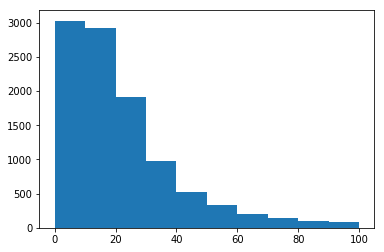

In [56]:
plt.hist((np.array(full['u925'])/np.abs(np.array(full['u650'])))*100, range=(0,100), bins=10)


In [90]:
def density_plot(v1,v2,v3):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())

    r = u_stat.pcor(v1,v2,v3)
    r = stats.pearsonr(v1,v2)
    print('pears', stats.pearsonr(v1,v2))
    
    return data, r

In [91]:
(np.array(udic['low'])/np.array(udic['high']))*100

array([ -21.05364 ,  -23.97467 ,  -14.366095, ...,  -45.36548 ,
         -8.297613, -101.14875 ], dtype=float32)

pears (-0.1660955580530339, 3.329469041508756e-34)


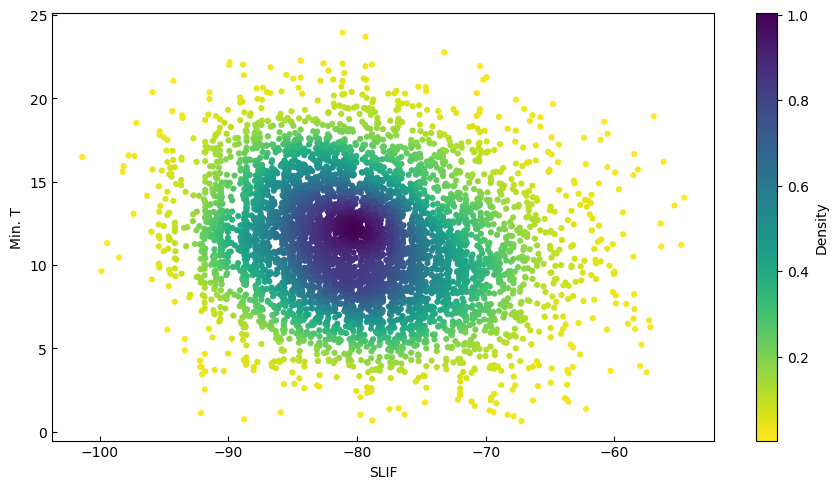

In [123]:

fig = plt.figure(figsize=(9, 5), dpi=100)
cc=11
ax = fig.add_subplot(111)

udic = get_col(np.array(s1['u_col']))
vdic = get_col(np.array(s1['v_col']))
qdic = get_col(np.array(s1['q_col']))

high, wd = u_met.u_v_to_ws_wd(np.array(udic['high']), np.array(vdic['high']))
low, wd = u_met.u_v_to_ws_wd(np.array(udic['low']), np.array(vdic['low']))

v1 = np.abs(high)#-np.array(low)
v2 = s1['tmin']#full['tmin']

#ipdb.set_trace()

data1, r1 = density_plot(v2, v1, np.array(s1['q925']))

mappable = ax.scatter(v2, v1, c=data1, edgecolor='', cmap='viridis_r', s=20) # viridis_r
ax.set_ylabel('Min. T')
ax.set_xlabel('SLIF')
#ax1.set_title('P-corr. shear/Tmin | q removed: '+str(np.round(r1[0], decimals=2)), fontsize=cc)
ax.tick_params(direction='in')
cbar = fig.colorbar(mappable)
cbar.set_label('Density')

#ax.set_ylim(0,100)
plt.tight_layout()



In [ ]:
plot_scatter_month

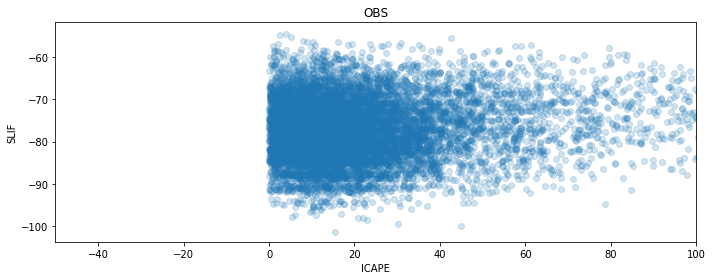

In [40]:
f = plt.figure(figsize=(10,4))
# ax = f.add_subplot(131)
# plt.xlabel('q925')
# plt.ylabel('prcp')
# plt.title('P25')
# isq = cp25p.q925>14
# isqq = cp4p.q925>14
# plt.scatter(cp25p.q925-cp25p.q700, cp25p.tmin, alpha=0.08)

# ax = f.add_subplot(132)
# plt.scatter(cp4p.q925-cp4p.q700, cp4p.tmin, alpha=0.08)
# plt.xlabel('q925')
# plt.title('CP4')
# plt.ylabel('prcp')
# ax.set_ylim(0,150)

ax = f.add_subplot(111)
plt.scatter(, full['tmin'],  alpha=0.2)
plt.xlabel('ICAPE')
plt.title('OBS')
plt.ylabel('SLIF')
ax.set_xlim(-50,100)
plt.tight_layout()

In [792]:
alln=7
nbs= alln
nbq= alln
nba = alln

p1 = 5
p2 = 99

shearb_march = np.percentile(ds_march.shear[(ds_march.shear>=np.percentile(ds_march.shear,p1)) & (ds_march.shear<=np.percentile(ds_march.shear,p2))], np.linspace(0,100,nbs)) #np.percentile(ds_march.shear[(ds_march.shear>=3) & (ds_march.shear<=17)], np.linspace(0,100,nbs))
#shearb_march = np.percentile(obs_march.shear[(obs_march.shear>=np.percentile(obs_march.shear,p1)) & (obs_march.shear<=np.percentile(obs_march.shear,p2))], np.linspace(0,100,nbs)) #np.percentile(ds_march.shear[(ds_march.shear>=3) & (ds_march.shear<=17)], np.linspace(0,100,nbs))

shearc_march = np.percentile(cp4_march.shear[(cp4_march.shear>=np.percentile(cp4_march.shear,p1)) & (cp4_march.shear<=np.percentile(cp4_march.shear,p2))], np.linspace(0,100,nbs)) # np.percentile(cp4_march.shear[(cp4_march.shear>=8) & (cp4_march.shear<=20)], np.linspace(0,100,nbs))
shear25_march = np.percentile(cp25_march.shear[(cp25_march.shear>=np.percentile(cp25_march.shear,p1)) & (cp25_march.shear<=np.percentile(cp25_march.shear,p2))], np.linspace(0,100,nbs)) # np.percentile(cp25_march.shear[(cp4_march.shear>=8) & (cp25_march.shear<=20)], np.linspace(0,100,nbs))

# shearb_march = np.percentile(ds_march.shear[(ds_march.shear>=3) & (ds_march.shear<=17)], np.linspace(0,100,nbs))
# shearc_march = np.percentile(cp4_march.shear[(cp4_march.shear>=8) & (cp4_march.shear<=20)], np.linspace(0,100,nbs))
# shear25_march = np.percentile(cp25_march.shear[(cp4_march.shear>=8) & (cp25_march.shear<=20)], np.linspace(0,100,nbs))




abins = np.linspace(5000,250000, nba)
qbinsb_march = np.linspace(np.percentile(ds_march.q925, p1) , np.percentile(ds_march.q925, p2), nbq) 
#qbinsb_march = np.linspace(np.percentile(obs_march.q925, p1) , np.percentile(obs_march.q925, p2), nbq) 
qbinsc_march = np.linspace(np.percentile(cp4_march.q925, p1) , np.percentile(cp4_march.q925, p2), nbq)
qbinsc25_march = np.linspace(14 , np.percentile(cp25_march.q925, p2), nbq)

nbqq = 7
nbss = 7

p1 = 5#10
p2 = 99 #90

shear_obsp = np.percentile(obsp.shear[(obsp.shear>=np.percentile(obsp.shear,p1)) & (obsp.shear<=np.percentile(obsp.shear,p2))], np.linspace(0,100,nbss)) # np.percentile(cp25_march.shear[(cp4_march.shear>=8) & (cp25_march.shear<=20)], np.linspace(0,100,nbs))
#np.percentile(obsp.shear[(obsp.shear>=3) & (obsp.shear<=17)], np.linspace(0,100,nbss))
shear_cp4p = np.percentile(cp4p.shear[(cp4p.shear>=np.percentile(cp4p.shear,p1)) & (cp4p.shear<=np.percentile(cp4p.shear,p2))], np.linspace(0,100,nbss)) #np.percentile(cp4p.shear[(cp4p.shear>=8) & (cp4p.shear<=20)], np.linspace(0,100,nbss))
shear_cp25p = np.percentile(cp25p.shear[(cp25p.shear>=np.percentile(cp25p.shear,p1)) & (cp25p.shear<=np.percentile(cp25p.shear,p2))], np.linspace(0,100,nbss)) # np.percentile(cp25p.shear[(cp25p.shear>=8) & (cp25p.shear<=20)], np.linspace(0,100,nbss))

qbinso = np.linspace(np.percentile(obsp.q925, p1) , np.percentile(obsp.q925, p2), nbqq)
qbinsc= np.linspace(np.percentile(cp4p.q925, p1) , np.percentile(cp4p.q925, p2), nbqq)
qbinsc25 = np.linspace(14, np.percentile(cp25p.q925, p2), nbqq) # 15


Extreme rain 44.75290420610417


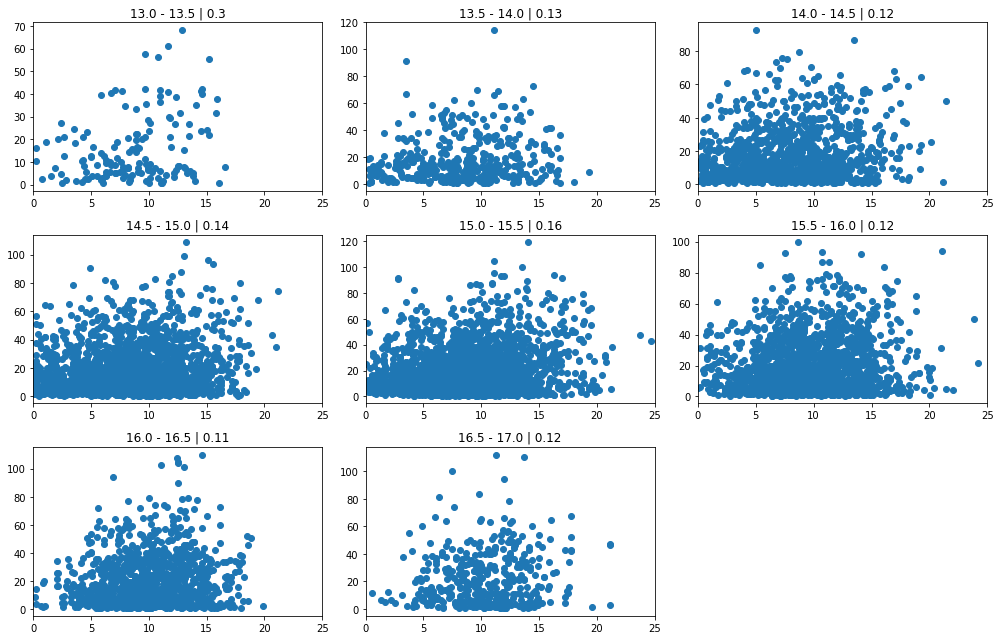

In [793]:
qbins_corr = np.percentile(obsp.q925, np.linspace(0,100,9))
qbins_corr = np.linspace(13,17,9)
extreme = np.percentile(obsp.prcp[obsp.prcp>1],90)
print('Extreme rain', extreme)
clist = []
f=plt.figure(figsize=(14,9))
for isq, qql in enumerate(qbins_corr[0:-1]):
        f.add_subplot(3,3,isq+1)
        poss_qq = (obsp.q925>=qql) & (obsp.q925 < qbins_corr[isq+1])
        plt.scatter(obsp.shear[poss_qq], obsp.prcp[poss_qq])
        ttslope = stats.pearsonr(obsp.shear[poss_qq], obsp.prcp[poss_qq])
        plt.xlim(0,25)
        #plt.ylim(0,120)
        plt.title(str(np.round(qql,2))+' - '+ str(np.round(qbins_corr[isq+1],2)) + ' | ' + str(np.round(ttslope[0],2)))
plt.tight_layout()
        

In [794]:
def create_2dhist(ds, xbins,ybins, precip=False):
#     sheardiff = shearbins[0:-1]+((xbins[1::]-shearbins[0:-1])/2)[0]
#     qdiff= qbins[0:-1] + ((qbins[1::]-qbins[0:-1])/2)[0]

    outperc_tt = np.zeros((len(ybins),len(xbins)))
    outperc_pp = np.zeros((len(ybins),len(xbins)))
    outval = np.zeros((len(ybins),len(xbins)))
    outarea_ds = np.zeros((len(ybins),len(xbins)))
    
    outprob =  np.zeros((len(ybins),len(xbins)))

    corrlist = []
    stdlist = []
    
    for isq, qql in enumerate(ybins[0:-1]):
        
        poss_qq = (ds.q925>=qql) & (ds.q925 < ybins[isq+1])
        if precip:
            cvar = ds.prcp
        else:
            cvar = ds.tmin
            
            
        try:
            #ttslope, intercept, rc, p, std_err = linregress(ds.shear[poss_qq],cvar[poss_qq])
            ttslope = stats.pearsonr(ds.shear[poss_qq],cvar[poss_qq])
            corrlist.append(ttslope) 
            #ds_amean = np.percentile(ds.area[poss_ds], 90)
        except IndexError:
            corrlist.append(np.nan)

        for issh, shl in enumerate(xbins[0:-1]):

            poss_ds = (ds.shear >= shl) & (ds.shear < xbins[issh+1]) & (ds.q925>=qql) & (ds.q925 < ybins[isq+1])
            
                             
            if precip:
                thresh = np.percentile(ds.prcp[ds.prcp>=0.1], 98)
                ttslope = np.sum(cvar[poss_ds] >=thresh) / np.sum(cvar>=0.1)
            else:

                thresh = np.percentile(ds.tmin, 2)
                ttslope = np.sum(cvar[poss_ds] <=thresh) / np.sum(cvar<=-50)

            outprob[issh,isq] = ttslope

                               
            try:
                #ds_mean = np.percentile(ds.tmin[poss_ds], 10)
                ds_mean = np.median(ds.tmin[poss_ds])
            except IndexError:
                ds_mean = np.nan
                
            try:
                #prcp_mean = np.percentile(ds.prcp[poss_ds], 90)
                prcp_mean = np.median(ds.prcp[poss_ds])
            except:
                prcp_mean = np.nan

            try:
                ds_amean = np.median(ds.area[poss_ds], 90)
                #ds_amean = np.percentile(ds.area[poss_ds], 90)
            except IndexError:
                ds_amean = np.nan
            


            outarea_ds[issh,isq] = ds_amean
            outperc_tt[issh,isq] = ds_mean
            outperc_pp[issh,isq] = prcp_mean

            outval[issh,isq] = np.sum(poss_ds)
            
    return outperc_tt, outperc_pp, outarea_ds, outval, corrlist

In [795]:
def hist2d_plot(data,xbins, ybins, vmin, vmax, valid=None):
    f = plt.figure()
    ax5 = f.add_subplot(111)
    X, Y = np.meshgrid(xbins,ybins)
    cmapp = uplot.discrete_cmap(8, base_cmap='RdBu_r')
    if valid is not None:
        data[valid<50] = np.nan
    Zm = ma.masked_where(np.isnan(data),data)

    mappable = ax5.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=vmin, vmax=vmax) # viridis_rvmin=20, vmax=40
    #mappable = ax5.pcolormesh(X, Y, Zm.T, cmap=cmapp) # viridis_rvmin=20, vmax=40

    ax5.set_ylabel('Max. q925hPa')
    ax5.set_xlabel('Max. u925hPa (equally populated)')
    ax5.set_title('')
    cbar = f.colorbar(mappable, ticks=np.linspace(vmin,vmax,9)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
    cbar.set_label('90th centile max. rain')
    plt.show()

In [796]:
def hist2d_quatro(data, valid=False):
    f = plt.figure(figsize=(10,7))
    for i, dat in enumerate(data):
        ax = f.add_subplot(2,2,i+1)
      
        X, Y = np.meshgrid(dat['xbins'],dat['ybins'])
        cmapp = uplot.discrete_cmap(8, base_cmap='RdBu_r')
        if valid:
            
            dat['data'][dat['valid']<10] = np.nan
        Zm = ma.masked_where(np.isnan(dat['data']),dat['data'])
       
        mappable = ax.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=dat['vmin'], vmax=dat['vmax']) # viridis_rvmin=20, vmax=40
        ax.set_ylabel(dat['ylabel'])
        ax.set_xlabel(dat['xlabel'])
        ax.set_title(dat['title'])
        cbar = f.colorbar(mappable, ticks=np.linspace(dat['vmin'],dat['vmax'],9)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
        cbar.set_label(dat['cbarlabel'])

    plt.tight_layout() 

In [797]:
def hist2d_six(data, valid=False):
    
    #from palettable.colorbrewer.qualitative import Blues_6, Reds_6_r
    
    f = plt.figure(figsize=(15,8))
    for i, dat in enumerate(data):
        ax = f.add_subplot(2,3,i+1)
        if i>2:
            cmap = 'Blues'
            cmapnum=6
        else:
            cmap = 'Reds_r'
            cmapnum=8
        X, Y = np.meshgrid(dat['xbins'],dat['ybins'])
        cmapp = uplot.discrete_cmap(cmapnum, base_cmap=cmap)
        if valid:
            
            dat['data'][dat['valid']<40] = np.nan
        Zm = ma.masked_where(np.isnan(dat['data']),dat['data'])
       
        mappable = ax.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=dat['vmin'], vmax=dat['vmax']) # viridis_rvmin=20, vmax=40
        ax.set_ylabel(dat['ylabel'])
        ax.set_xlabel(dat['xlabel'])
        ax.set_title(dat['title'])
        cbar = f.colorbar(mappable, ticks=np.linspace(dat['vmin'],dat['vmax'],cmapnum+1)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
        cbar.set_label(dat['cbarlabel'])

    plt.tight_layout() 
    plt.savefig(cnst.network_data + 'figs/CLOVER/fig3_corrected_u925_cp4_13km.png')

In [798]:
dsperc_mar, dsp_mar, dsarea_mar, dsval_mar, corr_ds = create_2dhist(ds_march, shearb_march, qbinsb_march)

In [799]:
cp4perc_mar, cp4pr_mar, cp4area_mar, cp4val_mar, corr_cp4 = create_2dhist(cp4_march, shearc_march, qbinsc_march)

/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [800]:
cp25perc_mar, pc25pr_mar, cp25area_mar, cp25val_mar, corr_cp25 = create_2dhist(cp25_march, shear25_march, qbinsc25_march)

In [801]:
cpobsperc, pcobs, obsarea, obsval, corr_pobs = create_2dhist(obsp, shear_obsp, qbinso, precip=True)
cp4perc, pc4, cp4area, cp4val, corr_pcp4 = create_2dhist(cp4p, shear_cp4p, qbinsc, precip=True)
cp25perc, pc25, cp25area, cp25val, corr_pcp25 = create_2dhist(cp25p, shear_cp25p, qbinsc25, precip=True)

In [802]:
print(ds_march.shear.mean())
print(ds_march.q925.mean())
corr_pobs

0.7769885926255703
15.283664499274778


[(0.08842900740958315, 0.008192946340343664),
 (0.1525314646305604, 5.652731709558705e-12),
 (0.1513457695810604, 7.481376055972859e-15),
 (0.10821090077104224, 2.415759769048505e-06),
 (0.10385422730386566, 0.0015621229776535074),
 (0.14098642417743926, 0.011064662418894228)]

In [803]:
pup = 100
pdown = 1
ds_mar_dic = {
    'data' : dsperc_mar,
    'ybins' : qbinsb_march,
    'xbins' : shearb_march,
    'title' : 'Observed',
    'valid' : dsval_mar,
    'cbarlabel' :'Median(Tmin)',
    'vmin' : np.percentile(dsperc_mar[(dsperc_mar!=0) & np.isfinite(dsperc_mar)],pdown),
    'vmax' : np.percentile(dsperc_mar[(dsperc_mar!=0) & np.isfinite(dsperc_mar)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}


In [804]:
cp4_mar_dic = {
    'data' : cp4perc_mar,
    'ybins' : qbinsc_march,
    'xbins' : shearc_march,
    'title' : 'CP4',
    'valid' : cp4val_mar,
    'cbarlabel' : 'Median(Tmin)',
    'vmin' : np.percentile(cp4perc_mar[(cp4perc_mar!=0) & np.isfinite(cp4perc_mar)],pdown),
    'vmax' : np.percentile(cp4perc_mar[(cp4perc_mar!=0) & np.isfinite(cp4perc_mar)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}


In [805]:
cp25_mar_dic = {
    'data' : cp25perc_mar,
    'ybins' : qbinsc25_march,
    'xbins' : shear25_march,
    'title' : 'P25',
    'valid' : cp25val_mar,
    'cbarlabel' : 'Median(Tmin)',
    'vmin' : np.percentile(cp25perc_mar[(cp25perc_mar!=0) & np.isfinite(cp25perc_mar)],pdown),
    'vmax' : np.percentile(cp25perc_mar[(cp25perc_mar!=0) & np.isfinite(cp25perc_mar)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}


In [806]:
pcobs[pcobs==0]=np.nan
obsp_dic = {
    'data' : pcobs,
    'ybins' : qbinso,
    'xbins' : shear_obsp,
    'title' : '',
    'valid' : obsval,
    'cbarlabel' : 'Median(Pmax)',
    'vmin' : np.percentile(pcobs[(pcobs>=1) & np.isfinite(pcobs)],pdown),
    'vmax' : np.percentile(pcobs[(pcobs>=1) & np.isfinite(pcobs)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}
pc4[pc4==0]=np.nan
cp4_dic = {
    'data' : pc4,
    'ybins' : qbinsc,
    'xbins' : shear_cp4p,
    'title' : '',
    'valid' : cp4val,
    'cbarlabel' : 'Median(Pmax)',
    'vmin' : np.percentile(pc4[(pc4>=1) & np.isfinite(pc4)],pdown),
    'vmax' : np.percentile(pc4[(pc4>=1) & np.isfinite(pc4)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}
pc25[pc25==0]=np.nan
cp25_dic = {
    'data' : pc25,
    'ybins' : qbinsc25,
    'xbins' : shear_cp25p,
    'title' : '',
    'valid' : cp25val,
    'cbarlabel' : 'Median(Pmax)',
    'vmin' : np.percentile(pc25[(pc25!=0) & np.isfinite(pc25)],pdown),
    'vmax' : np.percentile(pc25[(pc25!=0) & np.isfinite(pc25)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal


(array([1.000e+00, 2.000e+00, 1.600e+01, 3.900e+01, 1.540e+02, 3.350e+02,
        7.590e+02, 1.632e+03, 3.321e+03, 3.125e+03]),
 array([-65.99490949, -64.40235386, -62.80979823, -61.2172426 ,
        -59.62468696, -58.03213133, -56.4395757 , -54.84702006,
        -53.25446443, -51.6619088 , -50.06935316]),
 <a list of 10 Patch objects>)

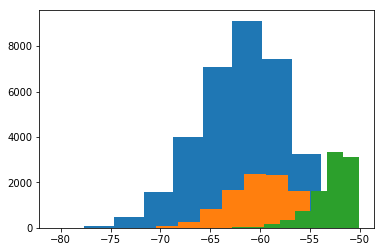

In [807]:
plt.hist(ds_march.tmean)
plt.hist(cp4_march.tmean)
plt.hist(cp25_march.tmean)

In [808]:
data_list = [ds_mar_dic, cp4_mar_dic, cp25_mar_dic,obsp_dic,cp4_dic,cp25_dic]

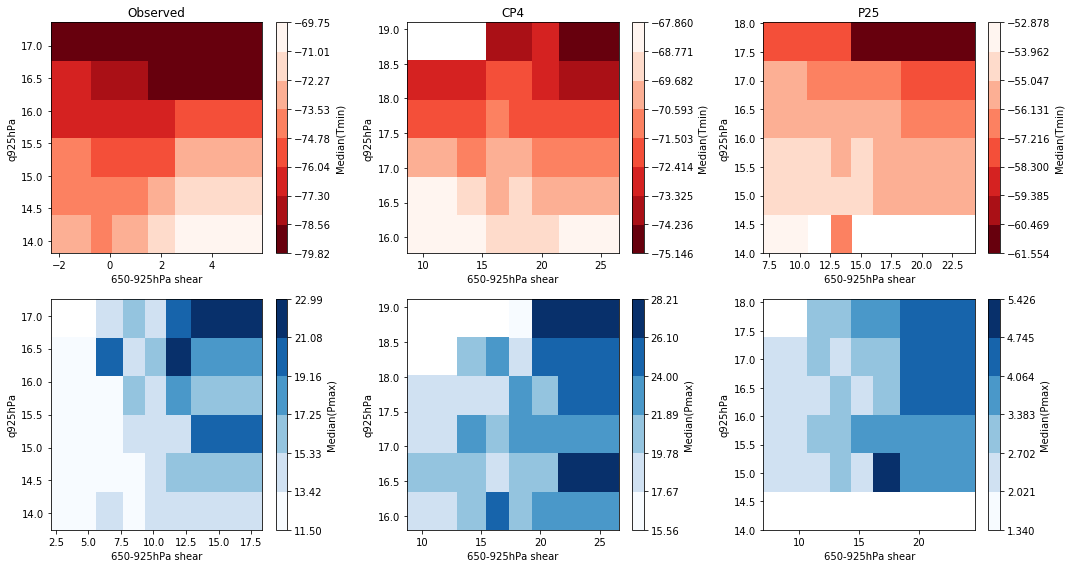

In [809]:
hist2d_six(data_list, valid=True)